In [1]:
# ccp_alpha: 값이 커지면 가지치기하는 노드수가 증가하고
# 값이 작아지면 가지치기하는 노드수가 감소한다(가지치기 양을 조정하는 옵션)
import pandas as pd

df = pd.read_csv("c:/data/customer/customer.csv")
df

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [2]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df["Churn"]
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [6]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample,y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Churn'])
df2 = pd.concat([X_samp,y_samp],axis=1)

In [7]:
X = df2[train_cols]
y = df2['Churn']
y.value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
# 가지치기 경로 정보
path = clf.cost_complexity_pruning_path(X_train, y_train)
# print(path)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas) # 값이 크면 제거된 노드수가 증가(가지치기 양을 조정하는 옵션)
print(impurities) # 노드의 불순도

[0.         0.00089523 0.0011839  0.00122775 0.00125241 0.00129489
 0.00131544 0.00132809 0.0013561  0.00136203 0.0013628  0.00136888
 0.00172281 0.00180879 0.00184162 0.00184162 0.00184162 0.00184162
 0.00184162 0.0019644  0.00207182 0.00209275 0.00223625 0.00224821
 0.0022851  0.00230203 0.0023678  0.00245347 0.00245461 0.00248619
 0.0025113  0.00260896 0.00298441 0.00322844 0.00331492 0.00354477
 0.00382118 0.00389866 0.00461927 0.00562095 0.00677066 0.0088924
 0.01059682 0.01647277 0.01845655 0.02019802 0.06421676 0.07432453]
[0.         0.0026857  0.00505349 0.00750899 0.01251864 0.01510841
 0.0177393  0.02039548 0.02310769 0.02583175 0.02855735 0.03129512
 0.03646354 0.04188992 0.04373154 0.04557316 0.04741478 0.0492564
 0.05109802 0.05306242 0.05513424 0.05931974 0.0660285  0.07052493
 0.07281003 0.07511205 0.07984765 0.0847546  0.10684609 0.10933228
 0.11435488 0.11696384 0.12293266 0.132618   0.13593291 0.13947769
 0.15858357 0.17027954 0.17489881 0.18051976 0.19406108 0.20295

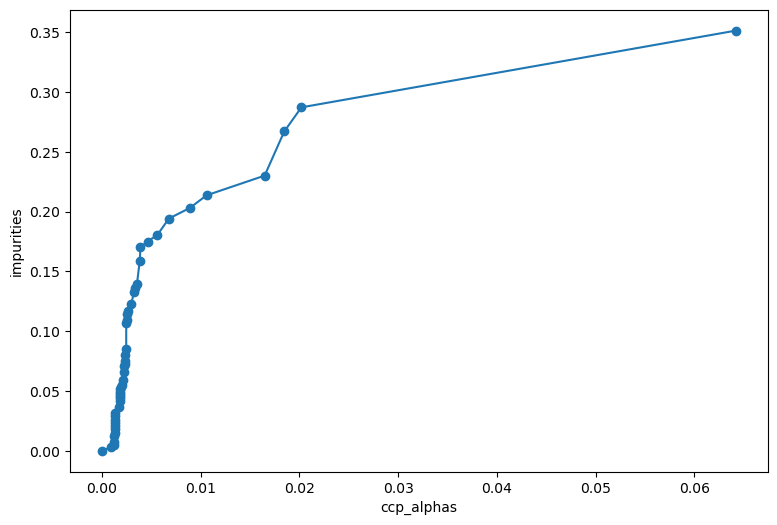

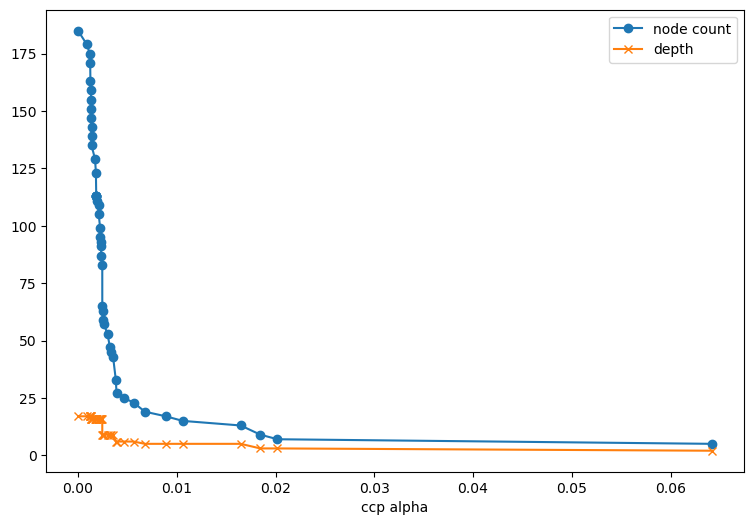

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# 마지막 값은 전체 트리를 가지치기하여 하나의 노드로 트리를 남기는 알파값이므로 제외하고 출력
plt.figure(figsize=(9,6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')
plt.xlabel("ccp_alphas")
plt.ylabel("impurities")
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
# 마지막 값은 전체 트리를 가지치기하여 하나의 노드로 트리를 남기는 알파값이므로 제외하고 출력
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(9,6))
plt.plot(ccp_alphas, node_counts, marker='o', label='node count')
plt.plot(ccp_alphas, depth, marker='x', label='depth')
plt.xlabel("ccp alpha")
plt.legend()
#ccp alpha가 증가하면 노드 갯수가 감소한다.(가지치기를 많이 하는 옵션)

최고 정확도: 0.9049586776859504
최적의 alpha: 0.005620946432860917


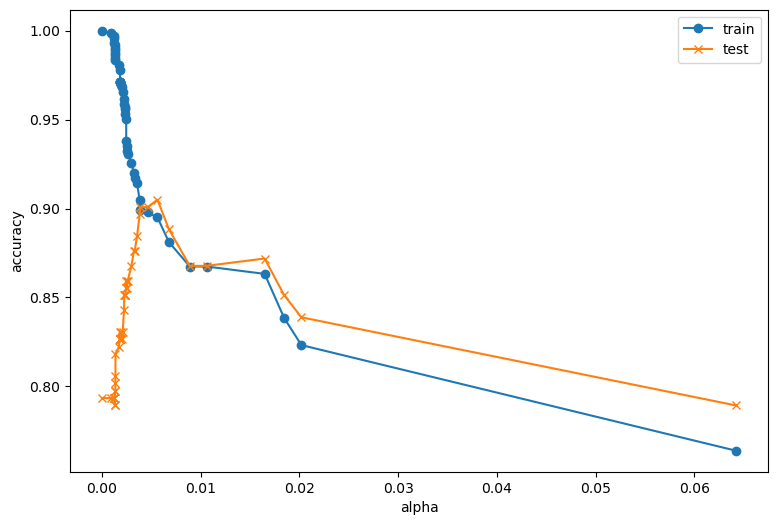

In [11]:
import numpy as np

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
m = max(test_scores)
i = np.argmax(test_scores)
print('최고 정확도:',m)
print('최적의 alpha:',ccp_alphas[i])
plt.figure(figsize=(9,6))
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alphas, train_scores, marker='o', label="train")
plt.plot(ccp_alphas, test_scores, marker='x', label="test")
plt.legend()

In [12]:
# ccp_alpha가 0이면 과적합 문제 발생
# 알파가 증가하면 가지치기가 진행되어 일반적인 트리가 됨
#model=DecisionTreeClassifier(random_state=0, ccp_alpha=0)
model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0033589246858478222)
#model=DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9171270718232044
0.8760330578512396


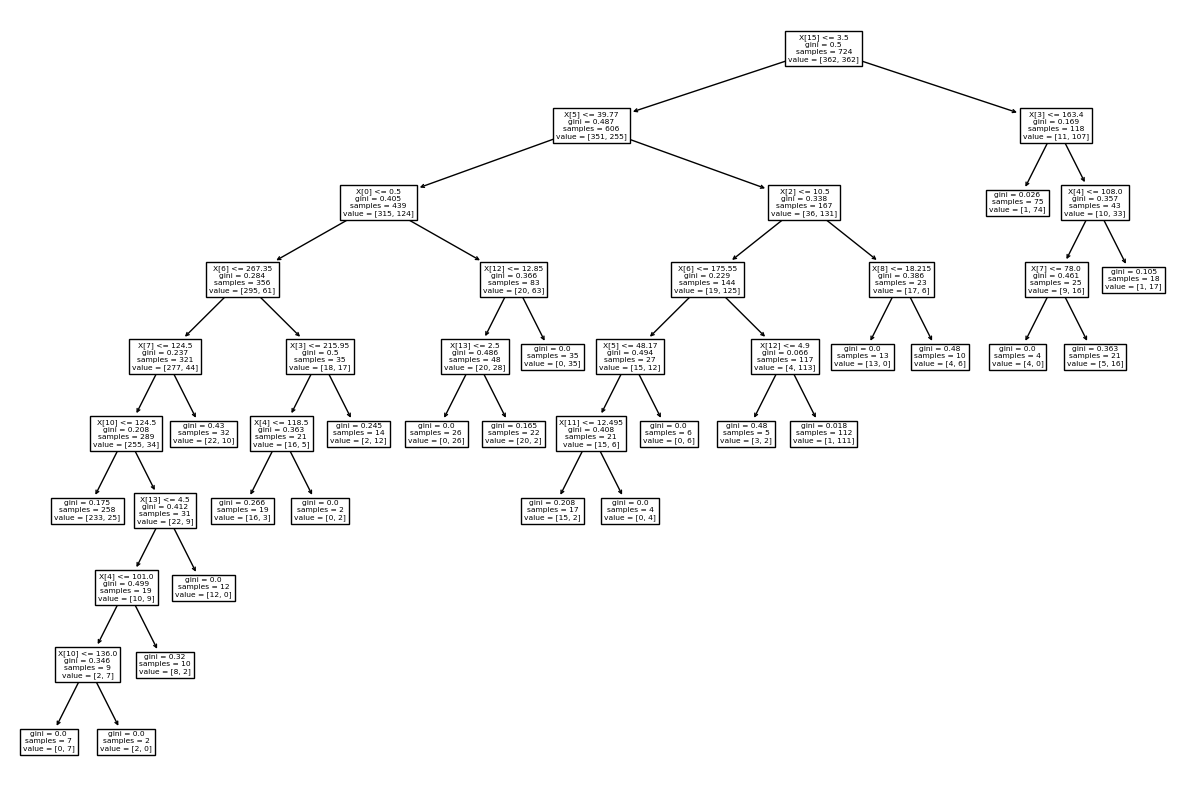

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10)) # 그래프의 사이즈 설정
tree.plot_tree(model) # 트리모형 그래프
plt.show()